In [44]:
import pandas as pd
import ydata_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for interactivity
import ipywidgets
from ipywidgets import interact

# Importing Data

In [45]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Preprocessing

In [46]:
crop.shape

(2200, 8)

In [47]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [48]:
crop.duplicated().sum()

0

In [49]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [50]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [51]:
corr = crop.corr()

In [52]:
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

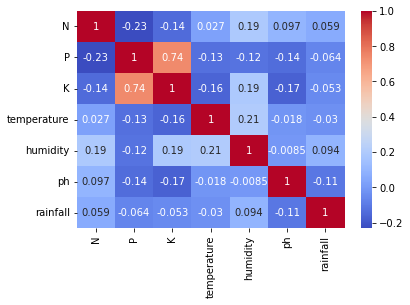

In [53]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm', fmt='.2g')

# Descriptive Statistics

In [54]:
#lets check the Summary for all the crops

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(crop['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(crop['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(crop['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(crop['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(crop['humidity'].mean()))
print("Average pH Value of the soil : {0:.2f}".format(crop['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(crop['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average pH Value of the soil : 6.47
Average Rainfall in mm : 103.46


# Encoding

In [55]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [56]:
# lets check the Summary Statistics for each of the Crops

@interact
def summary(crops = list(crop['label'].value_counts().index)):
    x = crop[crop['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [57]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average Value for", conditions, "is {0:.2f}".format(crop[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(crop[crop['label'] == 'rice'][conditions].mean()))
    print("Black Grams : {0:.2f}".format(crop[crop['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(crop[crop['label'] == 'banana'][conditions].mean()))
    print("Jute : {0:.2f}".format(crop[crop['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(crop[crop['label'] == 'coconut'][conditions].mean()))
    print("Apple : {0:.2f}".format(crop[crop['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(crop[crop['label'] == 'papaya'][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(crop[crop['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(crop[crop['label'] == 'grapes'][conditions].mean()))
    print("Watermelon : {0:.2f}".format(crop[crop['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(crop[crop['label'] == 'kidneybeans'][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(crop[crop['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(crop[crop['label'] == 'orange'][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(crop[crop['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(crop[crop['label'] == 'lentil'][conditions].mean()))
    print("Cotton : {0:.2f}".format(crop[crop['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(crop[crop['label'] == 'maize'][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(crop[crop['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(crop[crop['label'] == 'pigeonpeas'][conditions].mean()))
    print("Mango : {0:.2f}".format(crop[crop['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(crop[crop['label'] == 'pomegranate'][conditions].mean()))
    print("Coffee : {0:.2f}".format(crop[crop['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [58]:
from ipywidgets import interact

@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(crop[crop[conditions] > crop[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions, '\n')
    print(crop[crop[conditions] <= crop[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

# Analyzing Agricultural Conditions

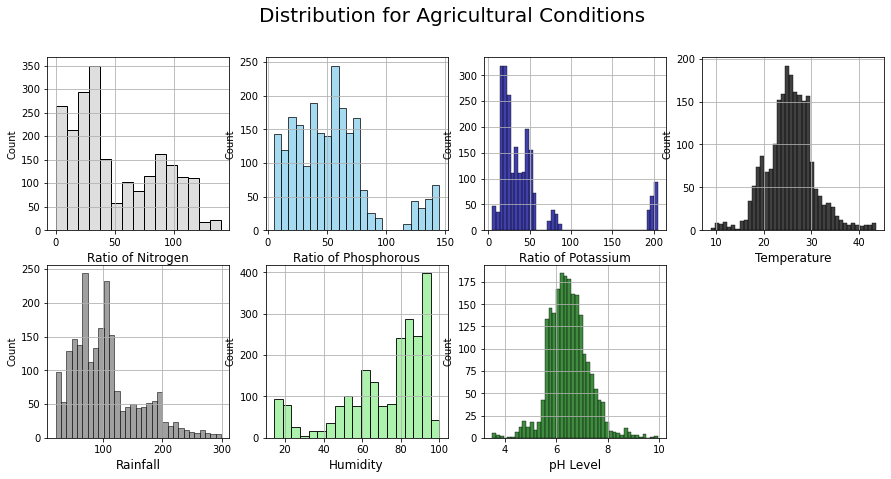

In [60]:
### Lets check the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.histplot(crop['N'], color='lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize=12)
plt.grid()

plt.subplot(2, 4, 2)
sns.histplot(crop['P'], color='skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize=12)
plt.grid()

plt.subplot(2, 4, 3)
sns.histplot(crop['K'], color='darkblue')
plt.xlabel('Ratio of Potassium', fontsize=12)
plt.grid()

plt.subplot(2, 4, 4)
sns.histplot(crop['temperature'], color='black')
plt.xlabel('Temperature', fontsize=12)
plt.grid()

plt.subplot(2, 4, 5)
sns.histplot(crop['rainfall'], color='grey')
plt.xlabel('Rainfall', fontsize=12)
plt.grid()

plt.subplot(2, 4, 6)
sns.histplot(crop['humidity'], color='lightgreen')
plt.xlabel('Humidity', fontsize=12)
plt.grid()

plt.subplot(2, 4, 7)
sns.histplot(crop['ph'], color='darkgreen')
plt.xlabel('pH Level', fontsize=12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize=20)
plt.show()

In [61]:
print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which require very High Ratio of Nitrogen Content in Soil:", crop[crop['N'] > 120]['label'].unique())
print("Crops which require very High Ratio of Phosphorous Content in Soil:", crop[crop['P'] > 100]['label'].unique())
print("Crops which require very High Ratio of Potassium Content in Soil:", crop[crop['K'] > 200]['label'].unique())
print("Crops which require very High Rainfall:", crop[crop['rainfall'] > 200]['label'].unique())
print("Crops which require very Low Temperature:", crop[crop['temperature'] < 10]['label'].unique())
print("Crops which require very High Temperature:", crop[crop['temperature'] > 40]['label'].unique())
print("Crops which require very Low Humidity:", crop[crop['humidity'] < 20]['label'].unique())
print("Crops which require very Low pH:", crop[crop['ph'] < 4]['label'].unique())
print("Crops which require very High pH:", crop[crop['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which require very Low Temperature: ['grapes']
Crops which require very High Temperature: ['grapes' 'papaya']
Crops which require very Low Humidity: ['chickpea' 'kidneybeans']
Crops which require very Low pH: ['mothbeans']
Crops which require very High pH: ['mothbeans']


In [67]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique())
print("-----------------------------------------------------")
print("                                                     ")
print("Winter Crops")
print(crop[(crop['temperature'] < 20) & (crop['humidity'] > 30)]['label'].unique())
print("-----------------------------------------------------")
print("")
print("Rainy Crops")
print(crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------------------
                                                     
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------------------

Rainy Crops
['rice' 'papaya' 'coconut']


In [68]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['label_num'] = crop['label'].map(crop_dict)

In [69]:
crop.drop('label',axis=1,inplace=True)

In [70]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [71]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label_num
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


# Train Test Split

In [72]:
# Split the dataset into features and labels
X = crop.iloc[:, :-1]
y = crop.iloc[:, -1]

In [73]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [25]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label_num, Length: 2200, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standarization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[-8.14149162e-01, -8.22608476e-01, -4.17586751e-01, ...,
        -1.10914730e+00, -1.00850068e+00, -1.14762954e-01],
       [-5.99794073e-01, -5.52511028e-01, -3.98018725e-01, ...,
        -8.39738838e-01,  6.40463882e-01, -2.12947619e-01],
       [ 2.30831896e-01, -2.82413580e-01, -4.95858854e-01, ...,
        -8.13537964e-02, -9.78595756e-01, -4.59356367e-01],
       ...,
       [-1.08209302e+00, -5.22500201e-01, -3.39314648e-01, ...,
        -9.20572349e-01,  6.00471872e-04, -3.53408620e-02],
       [-1.08209302e+00,  2.11845263e+00,  3.04595380e+00, ...,
         3.79045864e-01, -1.48070939e-01, -5.55371242e-01],
       [-5.19410914e-01,  7.37954558e-01, -5.15426879e-01, ...,
        -4.34666852e-01,  6.91994073e-01, -8.79579938e-01]])

In [31]:
X_test_scaled

array([[ 1.32940173, -1.09270592, -0.02622624, ...,  1.05275226,
        -0.37709414, -1.36794363],
       [ 1.24901857, -1.36280337,  0.05204587, ...,  0.67567482,
        -0.28048064, -0.95127435],
       [ 0.20403751,  0.25778132,  0.01290981, ...,  0.98944543,
         0.60675059,  0.22630399],
       ...,
       [-0.1710839 , -0.1923811 ,  0.13031797, ...,  0.88792123,
         0.35957596,  0.30716649],
       [-0.33185021,  0.6779329 ,  0.54124651, ..., -2.58405905,
         2.16021479, -0.59578774],
       [ 1.3829905 , -1.12271675,  0.01290981, ...,  0.45138154,
         0.5732209 , -0.90943832]])

# Training Models

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name}:\nAccuracy: {acc:.4f}')
    
# Selecting decistion tree model:
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
y_pred = rdf.predict(X_test)
print(accuracy_score(y_test,y_pred))

Linear Discriminant Analysis:
Accuracy: 0.9515


F:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9470
Naive Bayes:
Accuracy: 0.9939
Support Vector Machine:
Accuracy: 0.9636
K-Nearest Neighbors:
Accuracy: 0.9773
Decision Tree:
Accuracy: 0.9864
Random Forest:
Accuracy: 0.9909
Bagging:
Accuracy: 0.9879
AdaBoost:
Accuracy: 0.2106
Gradient Boosting:
Accuracy: 0.9833
Extra Trees:
Accuracy: 0.9364
0.9924242424242424


# Predictive System (Random Forest)

In [33]:
# Define function to make predictions
def predict_crop(N, P, K, temperature, humidity, pH, rainfall):
    # Create a numpy array with the input values
    input_values = np.array([[N, P, K, temperature, humidity, pH, rainfall]])
    
    # Use the model to make a prediction
    prediction = rdf.predict(input_values)
    
    # Return the predicted crop label
    return prediction[0]

In [34]:
N = 21
P = 26
K = 27
tem = 27.003155
humidity = 47.675254
ph = 5.699587
rainfall = 95.851183

pred = predict_crop(N, P, K, tem, humidity, ph, rainfall)

if pred == 1:
    print("Rice is the best crop to be cultivated right there")
elif pred == 2:
    print("Maize is the best crop to be cultivated right there")
elif pred == 3:
    print("Jute is the best crop to be cultivated right there")
elif pred == 4:
    print("Cotton is the best crop to be cultivated right there")
elif pred == 5:
    print("Coconut is the best crop to be cultivated right there")
elif pred == 6:
    print("Papaya is the best crop to be cultivated right there")
elif pred == 7:
    print("Orange is the best crop to be cultivated right there")
elif pred == 8:
    print("Apple is the best crop to be cultivated right there")
elif pred == 9:
    print("Muskmelon is the best crop to be cultivated right there")
elif pred == 10:
    print("Watermelon is the best crop to be cultivated right there")
elif pred == 11:
    print("Grapes is the best crop to be cultivated right there")
elif pred == 12:
    print("Mango is the best crop to be cultivated right there")
elif pred == 13:
    print("Banana is the best crop to be cultivated right there")
elif pred == 14:
    print("Pomegranate is the best crop to be cultivated right there")
elif pred == 15:
    print("Lentil is the best crop to be cultivated right there")
elif pred == 16:
    print("Blackgram is the best crop to be cultivated right there")
elif pred == 17:
    print("Mungbean is the best crop to be cultivated right there")
elif pred == 18:
    print("Mothbeans is the best crop to be cultivated right there")
elif pred == 19:
    print("Pigeonpeas is the best crop to be cultivated right there")
elif pred == 20:
    print("Kidneybeans is the best crop to be cultivated right there")
elif pred == 21:
    print("Chickpea is the best crop to be cultivated right there")
elif pred == 22:
    print("Coffee is the best crop to be cultivated right there")
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")

Mango is the best crop to be cultivated right there


F:\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
